# Predicting Student's Grades using Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

What is linear regression:
Linear Regression predicts a traget value based on various variables. In this case, we want to predict what the score of each student will be based on all their external factors. First, we import the data and filter it out to numerical data. I purposefully merge both schools together as the subject is not being measured for this model.

In [4]:
df1 = pd.read_csv('student-por.csv', sep = ";")
df2 = pd.read_csv('student-mat.csv', sep = ";")

df = pd.concat([df1, df2])

numerical = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout","Dalc", "Walc", "health", "absences", "G1", "G2", "G3"]

df[numerical]


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
5,16,4,3,1,2,0,5,4,2,1,2,5,6,12,12,13
6,16,2,2,1,2,0,4,4,4,1,1,3,0,13,12,13
7,17,4,4,2,2,0,4,1,4,1,1,1,2,10,13,13
8,15,3,2,1,2,0,4,2,2,1,1,1,0,15,16,17
9,15,3,4,1,2,0,5,5,1,1,1,5,0,12,12,13


Next, we want to look for correlational data, to see what we can graph and visualize. This will help us understand our dataset, as well as what features may be important for our model

In [5]:
corr = df.corr(method = "pearson")
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


Since we are looking to predict the final grade of each student, we can look at which row has the highest and lowest correlation. We want to ignore the grade correlations, since those are going to be predicted and should not impact each other. 

In [6]:
g1 = corr.loc[corr["G1"].idxmax()]
g2 = corr.loc[corr["G2"].idxmax()]
g3 = corr.loc[corr["G3"].idxmax()]

corrser = pd.concat([g1, g2, g3], axis=1)
corrser.G3.sort_values(ascending=False)

G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
famrel        0.054461
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64

Looking at this table, the columns that stand out the most are the failures, as well at the studytime column. Let's plot these values to see an exact correlation. For reference, here are the explanations for the two features:

failures - number of past class failures (numeric: n if 1 <= n < 3, else 4)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

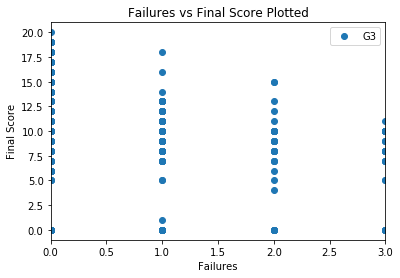

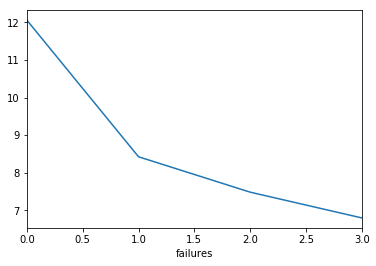

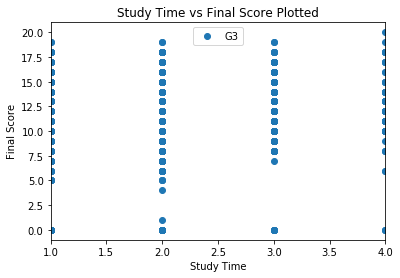

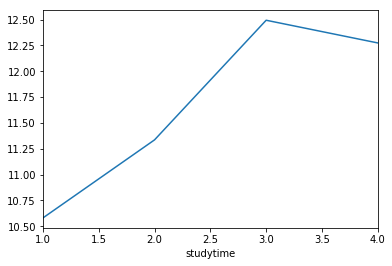

In [7]:
df.plot(x="failures", y="G3", style = "o")
plt.title("Failures vs Final Score Plotted")
plt.xlabel("Failures")
plt.ylabel("Final Score")
plt.show()

ser = df.groupby('failures').G3.mean()
ser.plot()


df.plot(x="studytime", y="G3", style = "o")
plt.title("Study Time vs Final Score Plotted")
plt.xlabel("Study Time")
plt.ylabel("Final Score")
plt.show()

ser = df.groupby('studytime').G3.mean()
ser.plot()

Looking at this data helps us understand a little more about how our features affect the current data, and how it may affect the prediction. We can see that having more failures causes the average student score to go down, as well as studying more causes the score to go up. Now, lets create a linear regression model and use the features that have correlation. I will choose the top 3 coorelated features, as we don't want everything. First, we need to filter and split our data

In [8]:
from sklearn.model_selection import train_test_split

numer = df[numerical]
X = numer.loc[:, 'age': 'G2']
y = numer["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

Now that the data is split, we can fit a Linear Regression Model on it.

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)


From here, let's look at the the scores we have predicted.

In [10]:
from sklearn import metrics

preddf = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
preddf.head(25)

,Actual,Predicted
322,11,10.867755
280,10,9.175117
536,14,14.779131
175,9,9.297161
644,10,10.204694
128,0,2.238290
329,14,14.271025
231,10,10.074724
11,12,12.257330
548,11,10.051689


We can also do some evaluation of our model, and see how accurate we were. For this, we want to evaluate the score, as well as the average of the errors (or the mean errors). This average is generally calculated through the metrics Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error. 

In [11]:
import statistics
print("Score: ", reg.score(X_test, y_test))
print("Mean Value: ", (y_test.mean() + pred.mean())/2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by=["Coefficient"], ascending=False)

Score:  0.8239712954586929
Mean Value:  11.287086844020186
Mean Absolute Error: 1.0331656347923832
Mean Squared Error: 2.6511420682122893
Root Mean Squared Error: 1.6282328052868513


,Coefficient
G2,0.903584
famrel,0.229038
G1,0.200568
Walc,0.094644
traveltime,0.061036
absences,0.059429
Dalc,0.028666
freetime,0.015506
Medu,0.012047
studytime,-0.055606


Finally, we can visualize the actual values and predicted values, and get a general understanding of what the scores looked liked. 

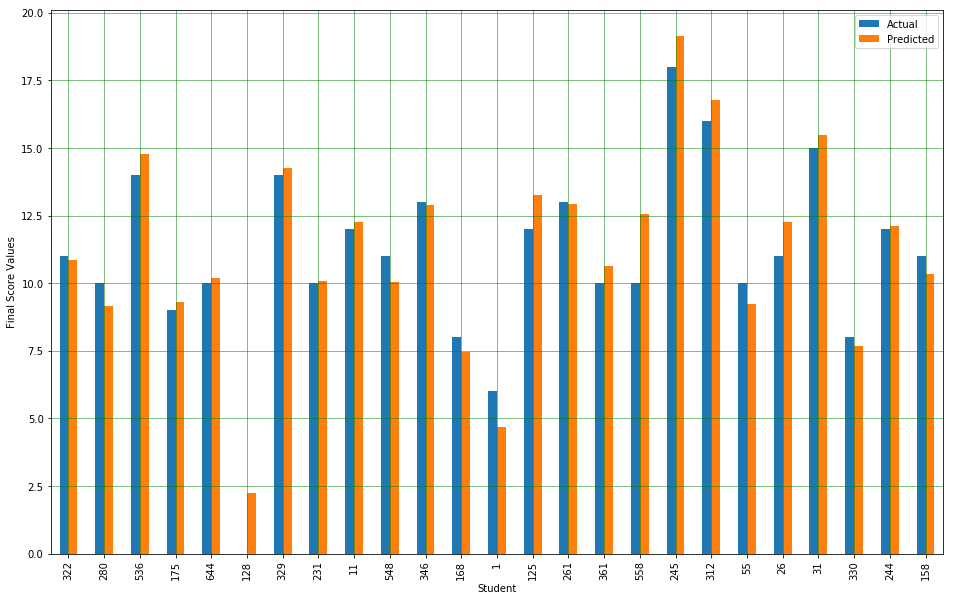

In [12]:
df1 = preddf.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Student")
plt.ylabel("Final Score Values")
plt.show()

In conclusion, our basic Linear Regression Model was pretty good, as it was able to make a correct prediction 82% of the time. It is worth nothing that I ran into issues with my data selection while creating this model. Initally, I had tried to predict all scores (including G1 and G2), which in turn resulted in a 20% score accuracy. Once I changed this and, my score had jumped to 82%. 

It is also worth nothing that while our correlation had shown study time as the primary positive factor (excluding test scores), the model had used traveltime as its primary coefficient, with study time ending up having a negitive coefficient. 

Finally, I had decided to merge the 2 datasets together (even though each dataset represents a different subject) due to the fact that the data between both schools were similar enough to where it would not have a big impact on our model. Before merging the data, the model score was 83%, and after merging the data the model score became 82%. 